In [1]:
import pandas as pd

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [3]:
x=train.text
y=train.airline_sentiment
x_test=test.text

In [4]:
x

0        @SouthwestAir I am scheduled for the morning, ...
1        @SouthwestAir seeing your workers time in and ...
2        @united Flew ORD to Miami and back and  had gr...
3           @SouthwestAir @dultch97 that's horse radish 😤🐴
4        @united so our flight into ORD was delayed bec...
                               ...                        
10975                              @AmericanAir followback
10976    @united thanks for the help. Wish the phone re...
10977    @usairways the. Worst. Ever. #dca #customerser...
10978    @nrhodes85: look! Another apology. DO NOT FLY ...
10979    @united you are by far the worst airline. 4 pl...
Name: text, Length: 10980, dtype: object

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
cv=CountVectorizer(max_features=5000,stop_words="english",ngram_range=(1,2))

In [57]:
x_cv=cv.fit_transform(x)

In [58]:
import numpy as np
xx=np.asarray(x_cv)
fxx=x_cv.toarray()

In [59]:
yy=[]
for i in y:
    if i=="positive":
        yy.append(0)
    elif i=="negative":
        yy.append(1)
    else:
        yy.append(2)

In [60]:
yyy=np.asarray(yy)

In [61]:
x_test_cv=cv.transform(x_test)

In [62]:
from keras.models import Sequential
from keras.layers import Dense

In [63]:
model=Sequential()
model.add(Dense(32,activation='softmax'))
model.add(Dense(32,activation='softmax'))
model.add(Dense(1,activation='softmax'))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(fxx,yyy,epochs=10)

Epoch 1/10
10980/10980 [==============================] - 6s 562us/step - loss: -0.7623 - acc: 0.6240
Epoch 2/10
10980/10980 [==============================] - 4s 364us/step - loss: -0.7623 - acc: 0.6240
Epoch 3/10
10980/10980 [==============================] - 4s 366us/step - loss: -0.7623 - acc: 0.6240
Epoch 4/10
10980/10980 [==============================] - 4s 393us/step - loss: -0.7623 - acc: 0.6240
Epoch 5/10
10980/10980 [==============================] - 4s 399us/step - loss: -0.7623 - acc: 0.6240
Epoch 6/10
10980/10980 [==============================] - 4s 399us/step - loss: -0.7623 - acc: 0.6240
Epoch 7/10
10980/10980 [==============================] - 4s 385us/step - loss: -0.7623 - acc: 0.6240
Epoch 8/10
10980/10980 [==============================] - 4s 367us/step - loss: -0.7623 - acc: 0.6240
Epoch 9/10
10980/10980 [==============================] - 4s 371us/step - loss: -0.7623 - acc: 0.6240
Epoch 10/10
10980/10980 [==============================] - 4s 372us/step - loss: -

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
clg=RandomForestClassifier()
clg.fit(x_cv,y)

/Users/sahilsagar/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [69]:
y_pre=clg.predict(x_test_cv)
clg.score(x_test_cv)

array(['negative', 'negative', 'negative', ..., 'neutral', 'positive',
       'negative'], dtype=object)

In [22]:
import nltk
freq=nltk.FreqDist(y_pre)
common=freq.most_common()
common

[('negative', 2417), ('neutral', 782), ('positive', 461)]

In [23]:
import matplotlib.pyplot as plt
xaxis=[common[0][1],common[1][1],common[2][1]]
yaxis=["negative",'neutral','positive']


In [24]:
import numpy
ypos=numpy.arange(len(yaxis))
ypos

array([0, 1, 2])

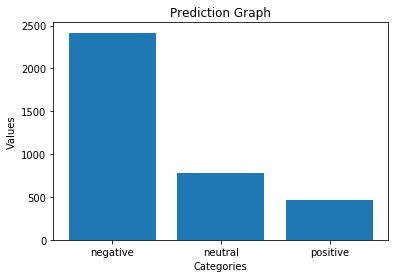

In [25]:
plt.xticks(ypos,yaxis)
plt.xlabel("Categories")
plt.ylabel("Values")
plt.title("Prediction Graph")
plt.bar(ypos,xaxis)
plt.show()
        

# Testing model 


In [70]:
s=[input("Enter your Review:---")]
xx=cv.transform(s)
print(clg.predict(xx))

Enter your Review:---i love it
['positive']


In [ ]:
s=[input("Enter your Review:---")]
xx=cv.transform(s)
print(clg.predict(xx))

In [72]:
s=[input("Enter your Review:---")]
xx=cv.transform(s)
print(clg.predict(xx))

Enter your Review:---it was a good flight and i love to use their service again 
['positive']
